In [1]:
%cd ..
%matplotlib nbagg

/home/elias/work/mnistconfidnet


In [28]:
from pathlib import Path

import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as T
from sklearn.metrics import accuracy_score

In [19]:
train_val_split = .8

train_valid_dataset = torchvision.datasets.MNIST(
    root=Path("~/datasets/MNIST").expanduser(),
    train=True,
    transform=T.ToTensor(),
    download=True)
nb_train = int(train_val_split * len(train_valid_dataset))
nb_valid = len(train_valid_dataset) - nb_train
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(
    train_valid_dataset, [nb_train, nb_valid])

<IPython.core.display.Javascript object>


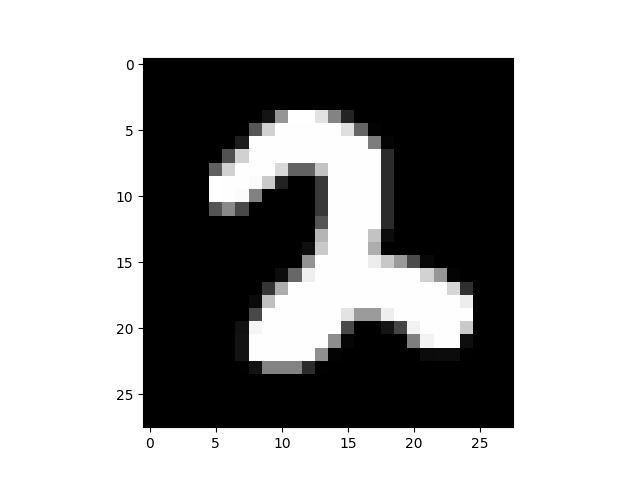

In [23]:
plt.figure()
plt.imshow(train_dataset[10][0][0], cmap="gray")

In [29]:
accuracy_score(torch.zeros(10, 1), torch.zeros(10, 1))

1.0